# Lab-7

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Data Loading

In [2]:
# Load the IMDb dataset
vocab_size = 10000  # Vocabulary size, we will keep the most frequent 10,000 words
max_len = 50  # Maximum length of a review
embedding_dim = 128  # Dimension of word embeddings

In [3]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

# Pad sequences to have the same length
X_train = pad_sequences(X_train, padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post', maxlen=50)

17464789/17464789 [==============================] - 0s 0us/step


## Model Building
### RNN
RNN stands for Recurrent Neural Network. Unlike feedforward neural networks, which have a strictly forward flow of information, RNNs have connections that form directed cycles, allowing them to exhibit dynamic temporal behavior. 

In [6]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2, input_length=50))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 2)             20000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Sigmoid
The sigmoid function, also known as the logistic function, is a common activation function used in neural networks. It squashes the input values between 0 and 1, which makes it useful for binary classification tasks where you want to predict probabilities.
### relu
ReLU is a simple and widely used activation function. It replaces all negative input values with zero and leaves positive values unchanged.
### tanh
Tanh is another activation function similar to the sigmoid function, but it squashes the input values between -1 and 1. Like the sigmoid function, tanh is also used in neural networks, especially in hidden layers.
### adam(Optimizer)
Adam is an optimization algorithm used to update the weights of the neural network based on training data. It combines ideas from RMSProp (Root Mean Square Propagation) and Momentum methods.

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 27s 152ms/step - loss: 0.6664 - accuracy: 0.5743 - val_loss: 0.5583 - val_accuracy: 0.7142
Epoch 2/5
157/157 [==============================] - 20s 126ms/step - loss: 0.4529 - accuracy: 0.7930 - val_loss: 0.4384 - val_accuracy: 0.7938
Epoch 3/5
157/157 [==============================] - 11s 66ms/step - loss: 0.3434 - accuracy: 0.8578 - val_loss: 0.4324 - val_accuracy: 0.7944
Epoch 4/5
157/157 [==============================] - 9s 60ms/step - loss: 0.2856 - accuracy: 0.8876 - val_loss: 0.4637 - val_accuracy: 0.7982
Epoch 5/5
157/157 [==============================] - 10s 61ms/step - loss: 0.2446 - accuracy: 0.9071 - val_loss: 0.4746 - val_accuracy: 0.7920


## Accuracy and evaluation

In [10]:
# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

782/782 [==============================] - 5s 6ms/step
R^2 Score: 0.4139682353380957


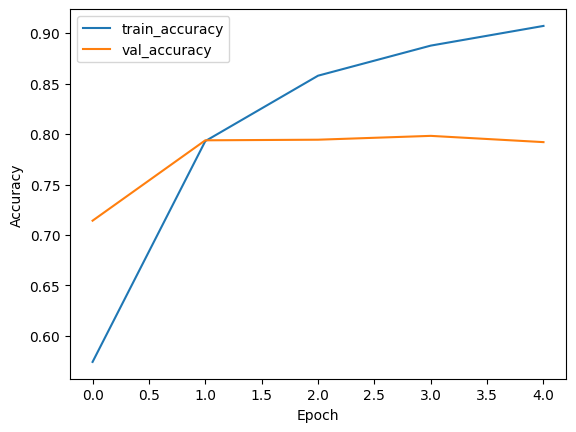

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()